<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 KB 7.5 MB/s eta 0:00:00


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 44.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61826161 sha256=248dc1445b24c2889cd146233893bd8233925222a081be231bd1cbaa127c6351
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9436506 sha256=5afa553ef1717c72f2561deac39c43525325ec1d486b578d0497c6492913ef77
  Stored in directory: /root/.cache/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988

In [ ]:
import pyupbit

In [19]:

import pyupbit
import pandas as pd
import time

# Upbit API로 데이터 가져오기
df = pyupbit.get_ohlcv("KRW-BTC", interval="minute15", count=365)

# 인덱스를 날짜/시간 형식으로 변환
df.index = pd.to_datetime(df.index, format="%Y-%m-%d %H:%M:%S")

# 데이터프레임 출력
print(df)

                           open        high         low       close  \
2023-04-03 23:30:00  37406000.0  37406000.0  37118000.0  37270000.0   
2023-04-03 23:45:00  37271000.0  37273000.0  37119000.0  37170000.0   
2023-04-04 00:00:00  37178000.0  37260000.0  37134000.0  37158000.0   
2023-04-04 00:15:00  37156000.0  37300000.0  37153000.0  37285000.0   
2023-04-04 00:30:00  37298000.0  37340000.0  37250000.0  37290000.0   
...                         ...         ...         ...         ...   
2023-04-07 22:30:00  36984000.0  37037000.0  36955000.0  36991000.0   
2023-04-07 22:45:00  37001000.0  37002000.0  36972000.0  36974000.0   
2023-04-07 23:00:00  36974000.0  37031000.0  36964000.0  37012000.0   
2023-04-07 23:15:00  37010000.0  37031000.0  36987000.0  37028000.0   
2023-04-07 23:30:00  37028000.0  37065000.0  37028000.0  37065000.0   

                        volume         value  
2023-04-03 23:30:00  65.312037  2.432132e+09  
2023-04-03 23:45:00  59.051796  2.195045e+09  
2023-0

In [20]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2023-04-03 23:30:00,37270000.0
1,2023-04-03 23:45:00,37170000.0
2,2023-04-04 00:00:00,37158000.0
3,2023-04-04 00:15:00,37285000.0
4,2023-04-04 00:30:00,37290000.0
...,...,...
380,2023-04-07 22:30:00,36991000.0
381,2023-04-07 22:45:00,36974000.0
382,2023-04-07 23:00:00,37012000.0
383,2023-04-07 23:15:00,37028000.0


In [21]:
#prophet 불러옴
from fbprophet import Prophet

In [22]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [23]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=10, freq='H')
forecast = model.predict(future)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


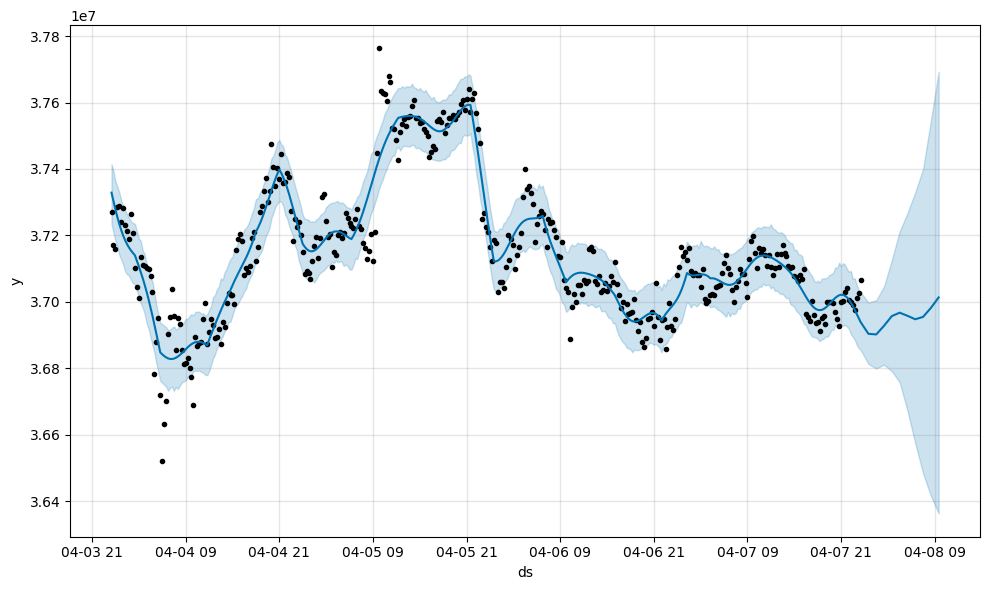

In [24]:
#그래프1
fig1 = model.plot(forecast)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


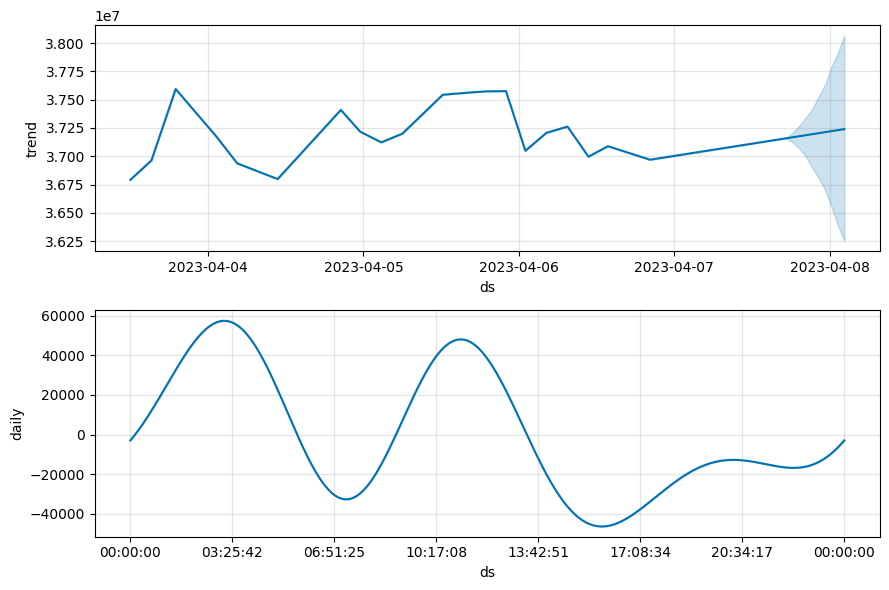

In [ ]:
#그래프2
fig2 = model.plot_components(forecast)

I'm still alive
I'm still alive
I'm still alive
I'm still alive
I'm still alive
I'm still alive
I'm still alive


KeyboardInterrupt: ignored